<a href="https://colab.research.google.com/github/GETHUB55/SkillTreePython-DataAnalysis/blob/main/ch05_03_%EA%B8%B0%EC%B4%88%EB%AA%A8%EB%8D%B8%EA%B5%AC%ED%98%84_%ED%9A%8C%EA%B7%80%EB%AA%A8%EB%8D%B8%EB%A7%9B%EB%B3%B4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch05.03. 기초모델 구현 - 회귀모델 맛보기
---
* 날짜:22.06.29
* 이름:조수빈

## 학습내용
    - 회귀 분석의 개념에 대해 이해한다
    - 단순 회귀 문제일 때의 프로세스에 대해 이해한다.
    - 다중 회귀 문제일 때의 프로세스에 대해 이해한다.
    - 모델링에 대한 전체적인 프로세스 과정을 이해한다. 

```
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
```

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

## 단순 회귀 문제
---




|공부시간(x)|종합점수(y)|
|------|---|
|3|20|
|5|50|
|5|60|
|7|90|
|8|100|

* 데이터 정의

In [4]:
x= np.array([3,5,5,7,8])
y= np.array([20,50,60,90,100])
x.shape, y.shape

((5,), (5,))

* 데이터 시각화

Text(0, 0.5, 'scare(y)')

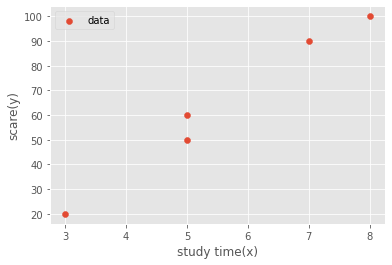

In [5]:
plt.scatter(x,y, label='data')
plt.legend()
plt.xlabel('study time(x)')
plt.ylabel('scare(y)')

### **| step 1. 모델 구현**

$model(x;w) = wx$



*   x는 함수의 인풋
*  ; 세미콜론 뒤에 있는 값은 : 함수 안에 있는 파라미터






* 모델 정의

In [7]:
def model(x,w=1):
 return x*w

* 초기 모델 사용


|공부시간(x)|종합점수(y)| 예측값 ($\hat{y})$|
|------|---|--|
|3|20||
|5|50||
|5|60||
|7|90||
|8|100||

In [10]:
print(x)
model(x)

[3 5 5 7 8]


array([3, 5, 5, 7, 8])

### **| step 2. 손실 (loss) 계산**

$loss = |(\hat{y}-y)|$

* 손실 계산 과정 정의

In [14]:
def loss(y,y_hat):
  return np.sum(np.abs(y-y_hat)) / len(y)


y_hat= model(x)
error = loss(y,y_hat)
print(f'x: {x}')  
print(f'y: {y}') 
print(f'y_hat: {y_hat}')  
print(f'error: {error}') 

x: [3 5 5 7 8]
y: [ 20  50  60  90 100]
y_hat: [3 5 5 7 8]
error: 58.4


### **| step 3. 최적화 (Optimizer)**


*  학습 파라미터 $w$를 5부터 20까지 바꿔가며 손실 계산하기


w=1 일때 error=58.4 
w=2 일때 error=52.8 
w=3 일때 error=47.2 
w=4 일때 error=41.6 
w=5 일때 error=36.0 
w=6 일때 error=30.4 
w=7 일때 error=25.2 
w=8 일때 error=20.8 
w=9 일때 error=16.4 
w=10 일때 error=12.0 
w=11 일때 error=9.6 
w=12 일때 error=7.2 
w=13 일때 error=8.8 
w=14 일때 error=14.4 
w=15 일때 error=20.0 
w=16 일때 error=25.6 
w=17 일때 error=31.2 
w=18 일때 error=36.8 
w=19 일때 error=42.4 
w=20 일때 error=48.0 


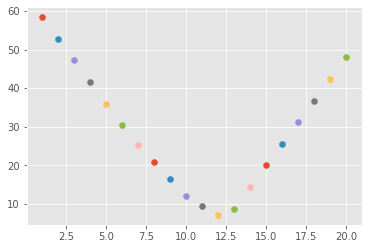

In [23]:
for w in range(1,21):
  y_pred = model(x,w=w)
  error = loss(y,y_pred)
  print(f'w={w} 일때 error={error} ')

# 가중치w에 대한 오차 error 시각화
  plt.scatter(w,error)



### **| step 4. 예측 (Prediction)**

* 학습 완료된 모델의 최종 손실 계산

In [26]:
w_ = 12
y_pred = model(x,w=w_)
error = loss(y,y_pred)
print(error)

7.2


* 학습 완료된 모델에 대한 예측 시각화

Text(0, 0.5, 'scare(y)')

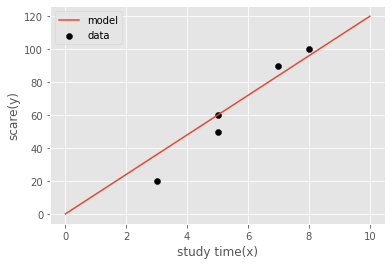

In [40]:
test_x = np.linspace(0, 10, 50)
#print(test_x)
test_y_pred = model(test_x,w=w_)
#print(test_y_pred)

# x값에 따른 y값
plt.scatter(x,y , label='data', c='k') #좌표 평면에 점 찍기
plt.plot(test_x,test_y_pred,label='model') #모델의 직선 그리기
plt.legend()
plt.xlabel('study time(x)')
plt.ylabel('scare(y)')

* 공부시간이 6시간일 때 예상 점수는?


In [33]:
model(6,w=w_)

72

### **| step 5. 평가 (Evaluation)**

* 훈련 데이터셋

|공부시간(x)|종합점수(y)|
|------|---|
|3|20|
|5|50|
|5|60|
|7|90|
|8|100|

* 테스트 데이터셋

|공부시간(x)|종합점수(y)|
|------|---|
|1|5|
|2|15|
|5|55|
|6|80|
|7|85|

* 테스트 데이터셋 정의

In [37]:
x_test= np.array([1,2,5,6,7])
y_test= np.array([5,15,55,80,85])


* 학습 완료된 모델에 테스트 데이터로 최종 손실 계산 (평가)

In [39]:
loss(y_test, model(x_test, w=w_))

6.0

* 학습 완료된 모델에 테스트 데이터 예측 시각화

Text(0, 0.5, 'scare(y)')

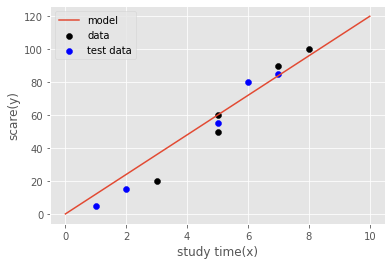

In [41]:
# x값에 따른 y값

#데이터
plt.scatter(x,y , label='data', c='k') #좌표 평면에 점 찍기
#모델
plt.plot(test_x,test_y_pred,label='model') #모델의 직선 그리기
#테스트 데이터
plt.scatter(x_test,y_test , label='test data', c='b')

plt.legend()
plt.xlabel('study time(x)')
plt.ylabel('scare(y)')

## 다중 회귀 문제
---



|공부시간|수면시간|종합점수|
|------|---|--|
|2|9|20|
|6|8|50|
|4|7|60|
|7|6|90|
|8|6|100|


* 데이터 정의

In [44]:
x=np.array([2,9,6,8,4,7,7,6,8,6]).reshape(5,2)
y=np.array([20,50,60,90,100])
print(x,x.shape)
print(y,y.shape)

[[2 9]
 [6 8]
 [4 7]
 [7 6]
 [8 6]] (5, 2)
[ 20  50  60  90 100] (5,)


* 데이터 시각화

Text(0.5, 0, 'score')

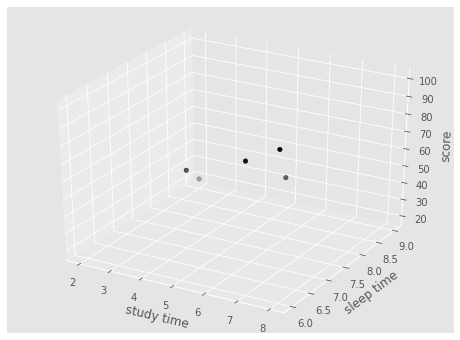

In [52]:
fig = plt.figure(figsize = (8,6)) # 그림 전체 사이즈 설정
ax = plt.axes(projection = '3d') # 좌표를 3d로 설정
# 공부시간(x_*1), 수면시간 (x_*2), 성적(y)
study_time = x[:, 0]
sleep_time =  x[:, 1]
ax.scatter3D(study_time, sleep_time, y, c='k', label='data')
ax.set_xlabel('study time')
ax.set_ylabel('sleep time')
ax.set_zlabel('score')


### **| step 1. 모델 구현**

$model(\vec{x};\vec{w}) = w_1x_1+w_2x_2$

* 모델 정의

In [54]:
def model2(x_vec,w_vec=np.array([1,1])):
  return np.dot(x_vec,w_vec)
x_vec = np.array([5,10])
model2(x_vec)

15

* 초기 모델 사용


|공부시간|수면시간|종합점수|예측값 ($\hat{y}$)|
|------|---|--|--|
|2|9|20|
|6|8|50|
|4|7|60|
|7|6|90|
|8|6|100|

In [57]:
print(x)
model2(x)

[[2 9]
 [6 8]
 [4 7]
 [7 6]
 [8 6]]


array([11, 14, 11, 13, 14])

### **| step 2. 손실 (loss) 계산**

$loss = |(\hat{y}-y)|$

* 손실 계산 과정 정의

In [60]:
def loss(y,y_hat):
  return np.sum(np.abs(y-y_hat)) / len(y) #각 샘플의 오차평균

y_hat= model2(x)
error = loss(y,y_hat)
print(f'x: {x}')  
print(f'y: {y}') 
print(f'y_hat: {y_hat}')  
print(f'error: {error}') 

x: [[2 9]
 [6 8]
 [4 7]
 [7 6]
 [8 6]]
y: [ 20  50  60  90 100]
y_hat: [11 14 11 13 14]
error: 51.4


### **| step 3. 최적화 (Optimizer)**


*  학습 파라미터 $w_1$를 0부터 30, $w_2$를 -10부터 10까지 바꿔가며 손실 계산하기


* 3d플롯으로 시각화

### **| step 4. 예측 (Prediction)**

* 최적화된 파라미터 정의

* 학습 완료된 모델의 최종 손실 계산

* 학습 완료된 모델에 대한 예측 시각화

* 공부시간이 6시간이고 수면시간 5시간 일 때 예상 점수는?


### **| step 5. 평가 (Evaluation)**

* 훈련 데이터셋


|공부시간|수면시간|종합점수|
|------|---|--|
|2|9|20|
|6|8|50|
|4|7|60|
|7|6|90|
|8|6|100|

* 테스트 데이터셋

|공부시간|수면시간|종합점수|
|------|---|--|
|1|7|15|
|3|8|25|
|5|7|60|
|5|6|90|
|10|7|95|

* 테스트 데이터셋 정의

* 학습 완료된 모델에 테스트 데이터로 최종 손실 계산

* 학습 완료된 모델에 테스트 데이터 예측 시각화

## 클래스 작성하기
---

```
단순 선형회귀 분석 클래스를 작성합니다.

model = Model() # 모델 클래스가 생성됩니다.
model.fit(xs, ys) # 최적화가 진행됩니다.
model.predict(xs) # 예측을 진행합니다.
model.validation(xs, ys) # 평가를 진행합니다.
```